In [1]:
from nltk.corpus import reuters
def collection_stats():
    documents = reuters.fileids()
    print(str(len(documents)) + " documents");
    train_docs = list(filter(lambda doc: doc.startswith("train"),documents));
    test_docs = list(filter(lambda doc: doc.startswith("test"),documents));
    categories = reuters.categories();
    category_docs = reuters.fileids("acq");
    document_id = category_docs[0]
    document_words = reuters.words(category_docs[0]);
    return documents,train_docs,test_docs,categories,category_docs,document_id,document_words

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stop_li=stopwords.words('english')

In [3]:
documents,train_docs,test_docs,categories,category_docs,document_id,document_words=collection_stats()

10788 documents


In [ ]:
import time
start=time.time()
train_data=[]
test_data=[]
train_labels=[]
test_labels=[]
for i in range(train_docs.__len__()):
    #if len(reuters.categories(train_docs[i]))<=1:
        if reuters.categories(train_docs[i])==["acq"] or reuters.categories(train_docs[i])==["corn"] or reuters.categories(train_docs[i])==["crude"] or reuters.categories(train_docs[i])==["earn"] or reuters.categories(train_docs[i])==["grain"] or reuters.categories(train_docs[i])==["interest"] or reuters.categories(train_docs[i])==["money-fx"] or reuters.categories(train_docs[i])==["ship"] or reuters.categories(train_docs[i])==["trade"] or reuters.categories(train_docs[i])==["wheat"]:
            res = [j for j in range(len(reuters.raw(train_docs[1]))) if reuters.raw(train_docs[1]).startswith("\n  ", j)]
            x=re.sub('#\S+',' ',str(reuters.raw(train_docs[i])[res[0]+3:res[-1]].replace("\n","")))
            x=re.sub('@\S+',' ',x)
            x=re.sub('\S+@\S+',' ',x)
            x=re.sub('http\S+',' ',x)
            x=re.sub('[^A-Za-z]',' ',x)
            x=re.sub('\d+',' ',x)
            li=[]
            for l in x.lower().split():
                if l.isalpha()==True:
                    li.append(l)
            str2=""
            for l in li:
                if l not in stop_li:
                        str2+=l+" "
            str_temp = word_tokenize(str2.lower())
            str3=""
            for k in str_temp:
                str3+=lemmatizer.lemmatize(k)+" "
            train_data.append(str3)
            train_labels.append(reuters.categories(train_docs[i]))
#end=time.time()
#print(end-start)

In [ ]:
for i in range(test_docs.__len__()):
    #if len(reuters.categories(test_docs[i]))<=1:
        if reuters.categories(test_docs[i])==["acq"] or reuters.categories(test_docs[i])==["corn"] or reuters.categories(test_docs[i])==["crude"] or reuters.categories(test_docs[i])==["earn"] or reuters.categories(test_docs[i])==["grain"] or reuters.categories(test_docs[i])==["interest"] or reuters.categories(test_docs[i])==["money-fx"] or reuters.categories(test_docs[i])==["ship"] or reuters.categories(test_docs[i])==["trade"] or reuters.categories(test_docs[i])==["wheat"]:
            res = [j for j in range(len(reuters.raw(test_docs[1]))) if reuters.raw(test_docs[1]).startswith("\n  ", j)]
            x=re.sub('#\S+',' ',str(reuters.raw(test_docs[i])[res[0]+3:res[-1]].replace("\n","")))
            x=re.sub('@\S+',' ',x)
            x=re.sub('\S+@\S+',' ',x)
            x=re.sub('http\S+',' ',x)
            x=re.sub('[^A-Za-z]',' ',x)
            x=re.sub('\d+',' ',x)
            li=[]
            for l in x.lower().split():
                if l.isalpha()==True:
                    li.append(l)
            str2=""
            for l in li:
                if l not in stop_li:
                        str2+=l+" "
            str_temp = word_tokenize(str2.lower())
            str3=""
            for k in str_temp:
                str3+=lemmatizer.lemmatize(k)+" "
            test_data.append(str3)
            test_labels.append(reuters.categories(test_docs[i]))

In [ ]:
import pandas as pd
df_train=pd.DataFrame({"data":[],"label":[]})
df_test=pd.DataFrame({"data":[],"label":[]})
df_train["data"]=train_data
df_train["label"]=train_labels
df_test["data"]=test_data
df_test["label"]=test_labels

In [ ]:
df_train.to_csv("train_lab7.csv")
df_test.to_csv("test_lab7.csv")

In [37]:
df1=pd.read_csv("train_lab7.csv",usecols=["data","label"])
df2=pd.read_csv("test_lab7.csv",usecols=["data","label"])

In [38]:
li_data1=list(df1["data"].values)
li_label1=list(df1["label"].values)
li_data2=list(df2["data"].values)
li_label2=list(df2["label"].values)
li_data=li_data1+li_data2
li_label=li_label1+li_label2

In [ ]:
df=pd.DataFrame({"data":[],"label":[]})
df["data"]=li_data
df["label"]=li_label
df.to_csv("lab7.csv")

In [ ]:
df.isna().sum()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df=df.reset_index()
df.drop("index",axis=1,inplace=True)

In [ ]:
#df.dropna(inplace=True)
df.to_csv("lab7.csv")

In [65]:
import pandas as pd
df=pd.read_csv("lab7.csv",usecols=["data","label"])

In [40]:
df["label"].value_counts()

['earn']        3900
['acq']         2289
['crude']        370
['trade']        324
['money-fx']     306
['interest']     271
['ship']         143
['grain']         51
Name: label, dtype: int64

In [66]:
for i in range(df.shape[0]):
    if df.loc[i,"label"]=="['earn']":
        df.loc[i,"label"]=0
    elif df.loc[i,"label"]=="['acq']":
        df.loc[i,"label"]=1
    elif df.loc[i,"label"]=="['crude']":
        df.loc[i,"label"]=2
    elif df.loc[i,"label"]=="['trade']":
        df.loc[i,"label"]=3
    elif df.loc[i,"label"]=="['money-fx']":
        df.loc[i,"label"]=4
    elif df.loc[i,"label"]=="['interest']":
        df.loc[i,"label"]=5
    elif df.loc[i,"label"]=="['ship']":
        df.loc[i,"label"]=6
    elif df.loc[i,"label"]=="['grain']":
        df.loc[i,"label"]=7

In [42]:
df

,data,label
0,computer terminal system inc said completed sa...,1
1,iacom international inc said lt national amuse...,1
2,ogers corp said first quarter earnings signifi...,0
3,telephone co ltd said previously announced two...,0
4,fit ct net loss v profit rev mln v mln year sh...,0
...,...,...
7649,french finance minister edouard balladur issue...,4
7650,philippine trade deficit widened mln dlrs eigh...,3
7651,soviet union agreed supply iran refined oil pr...,2
7652,e corp ltd lt chca said make offer fully paid ...,1


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
all_data=vectorizer.fit_transform("".join(i) for i in df["data"].values) 

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8).fit(all_data)

In [46]:
kmeans.labels_

array([1, 1, 1, ..., 6, 1, 6])

In [10]:
all_data.shape

(7654, 17142)

In [13]:
df1 = pd.DataFrame({'Labels': df["label"], 'Clusters': kmeans.labels_})
ct = pd.crosstab(df1['Labels'], df1['Clusters'])
print(ct)

Clusters     0    1    2    3    4    5    6    7
Labels                                           
0         1019   76  673  501  655  189  368  419
1         2192   95    2    0    0    0    0    0
2           16  354    0    0    0    0    0    0
3            1  291    0    0    0   32    0    0
4            3  298    0    0    0    5    0    0
5            0  269    0    0    0    2    0    0
6           15  128    0    0    0    0    0    0
7            2   49    0    0    0    0    0    0


In [24]:
import numpy as np
FP = ct.sum(axis=0) - np.diag(ct)  
FN = ct.sum(axis=1) - np.diag(ct)
TP = np.diag(ct)
TN = ct.values.sum() - (FP + FN + TP)

In [63]:
FN

Labels
0    2881
1    2194
2     370
3     324
4     306
5     269
6     143
7      51
dtype: int64

In [29]:
for i in range(8):
    print(TP[i]/(TP[i]+FP[i]))

0.3137315270935961
0.060897435897435896
0.0
0.0
0.0
0.008771929824561403
0.0
0.0


In [30]:
for i in range(8):
    print(TP[i]/(TP[i]+FN[i]))

0.2612820512820513
0.041502839667977284
0.0
0.0
0.0
0.007380073800738007
0.0
0.0


In [68]:
import numpy as np
from sklearn import metrics
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 
print("Purity score is: "+ str(purity_score(list(df["label"].values), kmeans.labels_)))

Purity score is: 0.7009406846093545


In [69]:
from sklearn.metrics.cluster import normalized_mutual_info_score
print("Normalized Mutual Info score is: "+ str(normalized_mutual_info_score(list(df["label"].values), kmeans.labels_)))
#normalized_mutual_info_score(list(df["label"].values), kmeans.labels_)

Normalized Mutual Info score is: 0.4224151647191208


In [16]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(list(df["label"].values), kmeans.labels_)
FP = c.sum(axis=0) - np.diag(c)  
FN = c.sum(axis=1) - np.diag(c)
TP = np.diag(c)
TN = c.sum() - (FP + FN + TP)

In [17]:
for i in FP:
    print(i)

2
420
655
1248
368
3274
501
224


In [226]:
for i in FN:
    print(i)

3533
2288
370
324
301
271
112
9


In [227]:
for i in TP:
    print(i)

367
1
0
0
5
0
31
42


In [228]:
for i in TN:
    print(i)

3754
4730
6612
6899
7131
6881
4195
6168


In [5]:
from nltk.corpus import reuters
def collection_stats():
    documents = reuters.fileids()
    print(str(len(documents)) + " documents");
    train_docs = list(filter(lambda doc: doc.startswith("train"),documents));
    test_docs = list(filter(lambda doc: doc.startswith("test"),documents));
    categories = reuters.categories();
    category_docs = reuters.fileids("acq");
    document_id = category_docs[0]
    document_words = reuters.words(category_docs[0]);
    return documents,train_docs,test_docs,categories,category_docs,document_id,document_words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stop_li=stopwords.words('english')
documents,train_docs,test_docs,categories,category_docs,document_id,document_words=collection_stats()

10788 documents


In [6]:
import time
start=time.time()
train_data=[]
test_data=[]
train_labels=[]
test_labels=[]
for i in range(train_docs.__len__()):
    if len(reuters.categories(train_docs[i]))<=1:
        if reuters.categories(train_docs[i])==["crude"] or reuters.categories(train_docs[i])==["grain"] or reuters.categories(train_docs[i])==["interest"]:
            res = [j for j in range(len(reuters.raw(train_docs[1]))) if reuters.raw(train_docs[1]).startswith("\n  ", j)]
            x=re.sub('#\S+',' ',str(reuters.raw(train_docs[i])[res[0]+3:res[-1]].replace("\n","")))
            x=re.sub('@\S+',' ',x)
            x=re.sub('\S+@\S+',' ',x)
            x=re.sub('http\S+',' ',x)
            x=re.sub('[^A-Za-z]',' ',x)
            x=re.sub('\d+',' ',x)
            li=[]
            for l in x.lower().split():
                if l.isalpha()==True:
                    li.append(l)
            str2=""
            for l in li:
                if l not in stop_li:
                        str2+=l+" "
            str_temp = word_tokenize(str2.lower())
            str3=""
            for k in str_temp:
                str3+=lemmatizer.lemmatize(k)+" "
            train_data.append(str3)
            train_labels.append(reuters.categories(train_docs[i]))
end=time.time()
print(end-start)

206.15853548049927


In [7]:
for i in range(test_docs.__len__()):
    if len(reuters.categories(test_docs[i]))<=1:
        if reuters.categories(test_docs[i])==["crude"] or reuters.categories(test_docs[i])==["grain"] or reuters.categories(test_docs[i])==["interest"]:
            res = [j for j in range(len(reuters.raw(test_docs[1]))) if reuters.raw(test_docs[1]).startswith("\n  ", j)]
            x=re.sub('#\S+',' ',str(reuters.raw(test_docs[i])[res[0]+3:res[-1]].replace("\n","")))
            x=re.sub('@\S+',' ',x)
            x=re.sub('\S+@\S+',' ',x)
            x=re.sub('http\S+',' ',x)
            x=re.sub('[^A-Za-z]',' ',x)
            x=re.sub('\d+',' ',x)
            li=[]
            for l in x.lower().split():
                if l.isalpha()==True:
                    li.append(l)
            str2=""
            for l in li:
                if l not in stop_li:
                        str2+=l+" "
            str_temp = word_tokenize(str2.lower())
            str3=""
            for k in str_temp:
                str3+=lemmatizer.lemmatize(k)+" "
            test_data.append(str3)
            test_labels.append(reuters.categories(test_docs[i]))

In [8]:
import pandas as pd
df_hier=pd.DataFrame({"data":[],"label":[]})
df_hier["data"]=train_data+test_data
df_hier["label"]=train_labels+test_labels

In [11]:
for i in range(df_hier.shape[0]):
    if df_hier.loc[i,"label"]==['crude']:
        df_hier.loc[i,"label"]=2
    elif df_hier.loc[i,"label"]==['interest']:
        df_hier.loc[i,"label"]=0
    else:
        df_hier.loc[i,"label"]=1

(697, 2)

In [12]:
df_hier.to_csv("lab7_hier.csv")

In [81]:
import pandas as pd
df=pd.read_csv("lab7_hier.csv",usecols=["data","label"])
df.dropna(inplace=True)

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
vectorizer=TfidfVectorizer()
all_data=vectorizer.fit_transform("".join(i) for i in df["data"].values) 

In [83]:
X = vectorizer.transform(df["data"].values)

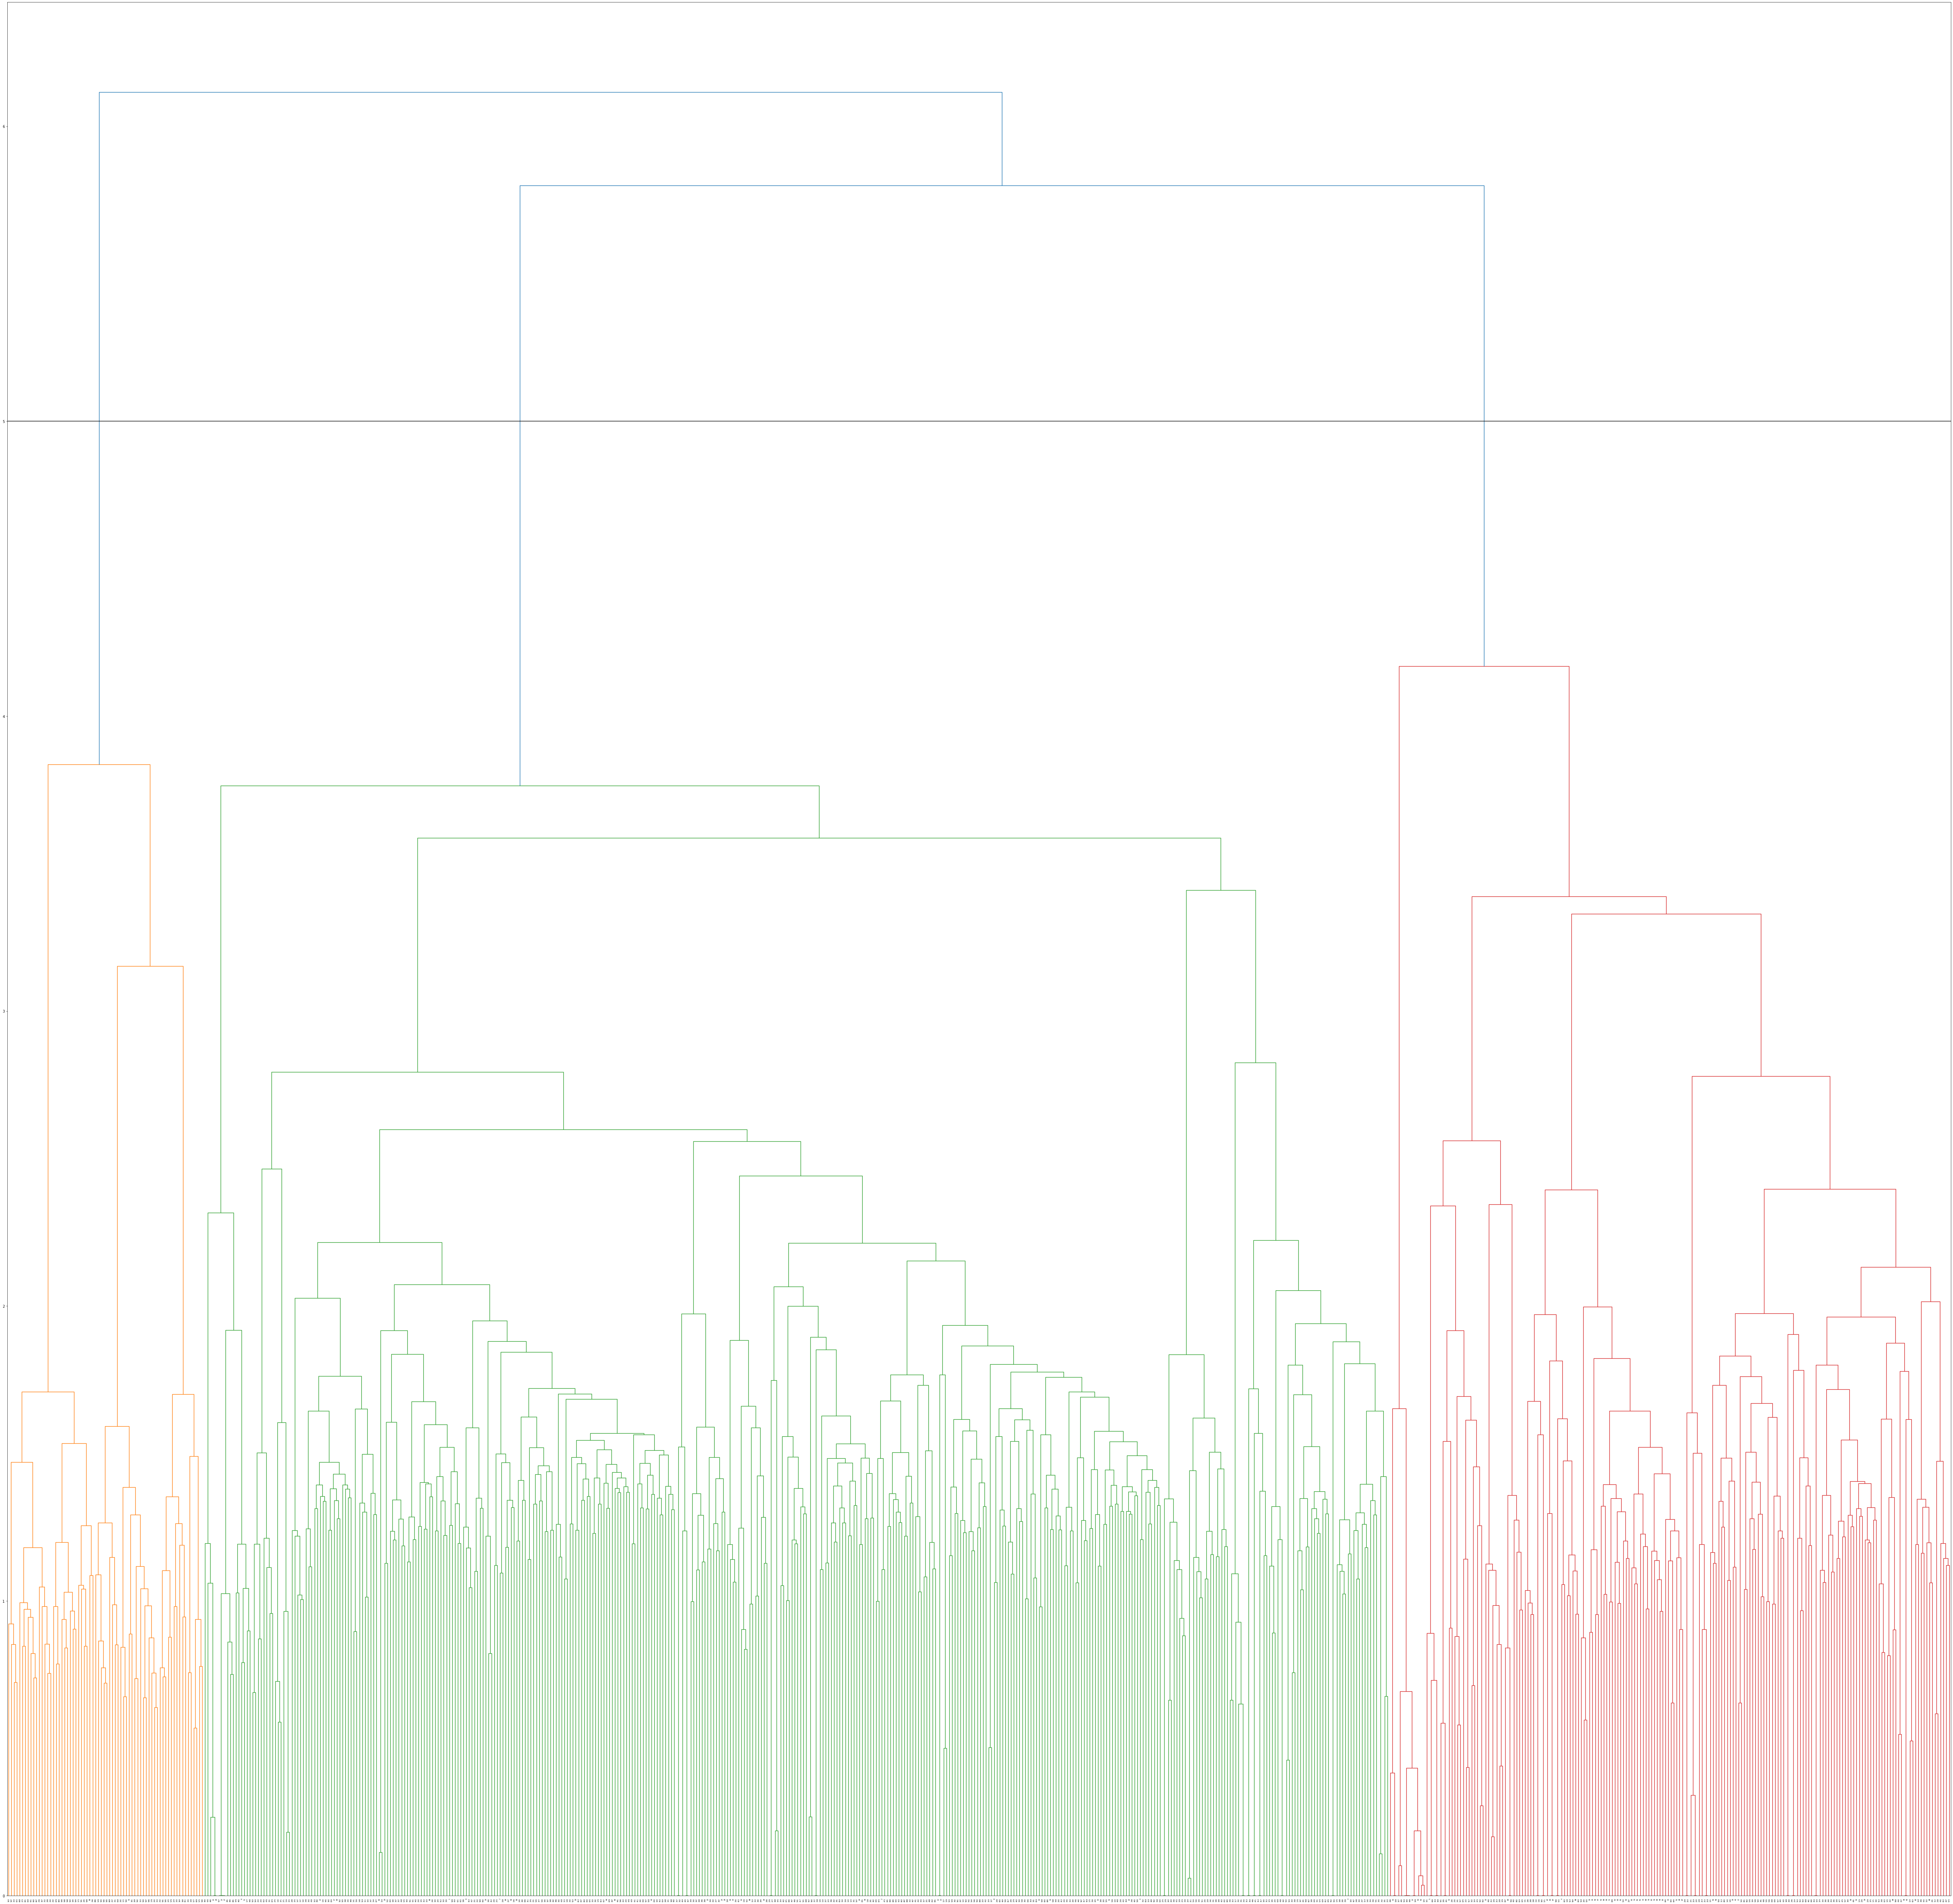

In [75]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
Z = hierarchy.linkage(np.array(X.todense()), 'ward')
plt.figure(figsize=(100, 100))
plt.axhline(y=5, c='k')
dn = hierarchy.dendrogram(Z)
plt.savefig("dendro.png")

In [84]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
li1=cluster.fit(all_data.toarray())

In [87]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')  
li2=cluster.fit(all_data.toarray())

In [88]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
li3=cluster.fit(all_data.toarray())

In [89]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
li4=cluster.fit(all_data.toarray())

In [85]:
from sklearn.metrics.cluster import adjusted_rand_score
print("Rand index for GAAC link is: "+str(adjusted_rand_score(list(df["label"].values), li1.labels_)))

Rand index for GAAC link is: 0.364075118774309


In [90]:
from sklearn.metrics.cluster import adjusted_rand_score
print("Rand index for Single link is: "+str(adjusted_rand_score(list(df["label"].values), li2.labels_)))

Rand index for GAAC link is: 0.007740545815847846


In [91]:
from sklearn.metrics.cluster import adjusted_rand_score
print("Rand index for Complete link is: "+str(adjusted_rand_score(list(df["label"].values), li3.labels_)))

Rand index for GAAC link is: 0.05352646522530991


In [92]:
from sklearn.metrics.cluster import adjusted_rand_score
print("Rand index for Centroid link is: "+str(adjusted_rand_score(list(df["label"].values), li4.labels_)))

Rand index for GAAC link is: 0.015557783078956925


In [93]:
print("Rand index for GAAC link is: "+str(adjusted_rand_score(list(df["label"].values), li1.labels_)))
print("Rand index for Single link is: "+str(adjusted_rand_score(list(df["label"].values), li2.labels_)))
print("Rand index for Complete link is: "+str(adjusted_rand_score(list(df["label"].values), li3.labels_)))
print("Rand index for Centroid link is: "+str(adjusted_rand_score(list(df["label"].values), li4.labels_)))

Rand index for GAAC link is: 0.364075118774309
Rand index for Single link is: 0.007740545815847846
Rand index for Complete link is: 0.05352646522530991
Rand index for Centroid link is: 0.015557783078956925
